In [ ]:
!pip install qiskit
!pip install qiskit[visualization]
!pip install qiskit_aer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=c7a66291710597cb05b68d7381c3e22b34a0d61ea68580e0e68e241831d9f5c2
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 81.2 MB/s eta 0:00:00


In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from qiskit import*
from qiskit.visualization import plot_histogram


In [ ]:
# Import image
img = cv.imread("Lena_img.jpg")


In [ ]:
from PIL import Image
import numpy as np

# Import image
img = Image.open("Lena_img.jpg")  # Replace with the actual path

# Acquire the dimensions of the original image
width, height = img.size  # Using img.size to get width and height

# If you need the image as a NumPy array for further processing:
img_np = np.array(img)

print(f'Original Dimensions : {height} x {width}')

Original Dimensions : 128 x 128


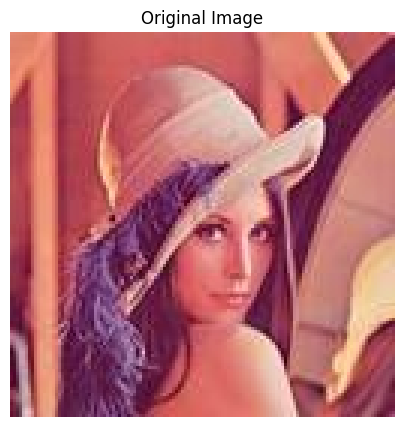

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
if img == 'L':
    ax.imshow(img_np, cmap='gray')  # Use grayscale colormap
else:  # If the image has multiple channels:
    ax.imshow(img_np)

ax.set_title('Original Image')
ax.axis('off')  # Hide the axis
plt.show()

In [ ]:
# Extract RGB channels
r_channel = img_np[:, :, 0] # Accessing the red channel from the NumPy array
g_channel = img_np[:, :, 1] # Accessing the green channel from the NumPy array
b_channel = img_np[:, :, 2]

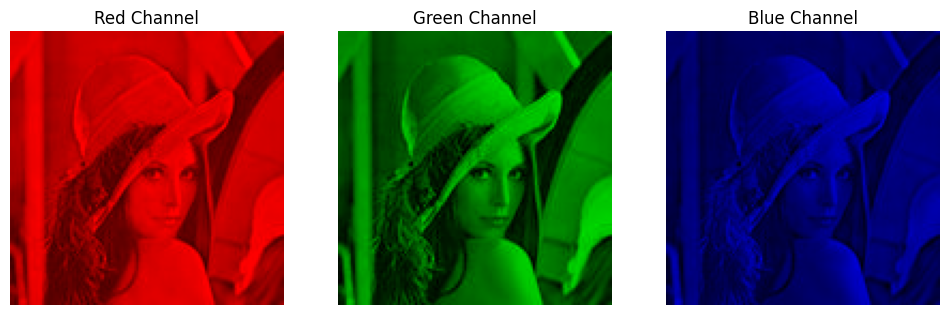

In [ ]:
# Create images that show each channel in its respective color
r_img = np.zeros_like(img) # creates an empty image with the same shape as the original image
g_img = np.zeros_like(img)
b_img = np.zeros_like(img)

r_img[:, :, 2] = r_channel
g_img[:, :, 1] = g_channel
b_img[:, :, 0] = b_channel

# Display the individual channels in their respective colors
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(cv.cvtColor(r_img, cv.COLOR_BGR2RGB))
axes[0].set_title('Red Channel')
axes[1].imshow(cv.cvtColor(g_img, cv.COLOR_BGR2RGB))
axes[1].set_title('Green Channel')
axes[2].imshow(cv.cvtColor(b_img, cv.COLOR_BGR2RGB))
axes[2].set_title('Blue Channel')

for ax in axes:
    ax.axis('off')

plt.show()


In [ ]:
# Function to extract and process 4x4 blocks
def extract_blocks(img, block_size=4):
    blocks = []
    if len(img.shape) == 2:  # Grayscale image
        height, width = img.shape
    else:  # Color image
        height, width, _ = img.shape
    # Iterating Over the Image to Extract Blocks
    for i in range(0, height, block_size): #i represents the starting row index for each block
        for j in range(0, width, block_size): #j represents the starting column index for each block
            block = img[i:i+block_size, j:j+block_size]
            blocks.append(block)
    return blocks
# Convert the pixel values into binary values for each block
def pixel_to_binary(pixel_matrix):
    binary_matrix = np.vectorize(np.binary_repr)(pixel_matrix, width=8)
    return binary_matrix

def process_and_print_blocks(blocks, channel_name, max_blocks=10):
    for block_num, block in enumerate(blocks, 1):
        if block_num > max_blocks: # index of the current block exceeds the no. of max block 10
            break  # Stop after printing max_blocks blocks
        binary_block = pixel_to_binary(block)
        print(f'{channel_name} Channel Binary Values for Block {block_num}:')
        print(binary_block)
        print()
# Extract blocks for each channel
r_blocks = extract_blocks(r_channel)
g_blocks = extract_blocks(g_channel)
b_blocks = extract_blocks(b_channel)

# Process and print binary values for all blocks in each channel
process_and_print_blocks(r_blocks, "Red")


Red Channel Binary Values for Block 1:
[['11100100' '11100011' '11100010' '11100001']
 ['11100000' '11100000' '11011111' '11011110']
 ['11011111' '11011110' '11011111' '11011110']
 ['11100000' '11011111' '11100000' '11100000']]

Red Channel Binary Values for Block 2:
[['11100001' '11100000' '11100001' '11100001']
 ['11011110' '11011101' '11011111' '11011110']
 ['11011110' '11011101' '11011110' '11011110']
 ['11100000' '11100000' '11100010' '11100001']]

Red Channel Binary Values for Block 3:
[['11011110' '11100111' '11101110' '11110001']
 ['11011111' '11101000' '11110000' '11110001']
 ['11100010' '11101011' '11110001' '11110000']
 ['11100100' '11101101' '11110010' '11101110']]

Red Channel Binary Values for Block 4:
[['11110100' '11101110' '11011000' '10111101']
 ['11110010' '11101011' '11010110' '10111110']
 ['11110000' '11101001' '11010100' '10111110']
 ['11101100' '11100101' '11010010' '10111110']]

Red Channel Binary Values for Block 5:
[['10100011' '10100111' '10101011' '10110000'

In [ ]:
process_and_print_blocks(g_blocks, "Green")


Green Channel Binary Values for Block 1:
[['10001001' '10001000' '10001000' '10000111']
 ['10000101' '10000101' '10000101' '10000100']
 ['10000100' '10000011' '10000011' '10000010']
 ['10000101' '10000101' '10000100' '10000100']]

Green Channel Binary Values for Block 2:
[['10000101' '10000100' '10000011' '10000011']
 ['10000010' '10000001' '10000001' '10000000']
 ['10000010' '10000010' '10000000' '10000000']
 ['10000101' '10000101' '10000100' '10000011']]

Green Channel Binary Values for Block 3:
[['10000000' '10001001' '10001101' '10010000']
 ['10000001' '10001010' '10010000' '10010000']
 ['10000010' '10001011' '10010001' '10001111']
 ['10000100' '10001101' '10010010' '10001101']]

Green Channel Binary Values for Block 4:
[['10010011' '10001101' '01110011' '01010111']
 ['10010001' '10001010' '01110001' '01011000']
 ['10001100' '10000101' '01101111' '01011000']
 ['10001000' '10000001' '01101101' '01011000']]

Green Channel Binary Values for Block 5:
[['00111011' '00111110' '01000010' 

In [ ]:
process_and_print_blocks(b_blocks, "Blue")


Blue Channel Binary Values for Block 1:
[['01110100' '01110011' '01110000' '01101111']
 ['01110000' '01110000' '01101101' '01101100']
 ['01101111' '01101110' '01101100' '01101011']
 ['01110000' '01101101' '01101101' '01101011']]

Blue Channel Binary Values for Block 2:
[['01101100' '01101011' '01101001' '01101001']
 ['01101001' '01101000' '01100111' '01100110']
 ['01101001' '01100111' '01100110' '01100110']
 ['01101010' '01101010' '01101010' '01101001']]

Blue Channel Binary Values for Block 3:
[['01100111' '01110000' '01111010' '01111101']
 ['01101000' '01110001' '01111010' '01111101']
 ['01101010' '01110011' '01111011' '01111100']
 ['01101100' '01110101' '01111100' '01111010']]

Blue Channel Binary Values for Block 4:
[['10000011' '01111101' '01100111' '01010010']
 ['10000000' '01111010' '01100101' '01010011']
 ['01111100' '01110110' '01100011' '01010011']
 ['01111000' '01110010' '01100001' '01010011']]

Blue Channel Binary Values for Block 5:
[['01000110' '01001111' '01010001' '0101

Red Channel Binary Values for First Block:
[['11100100' '11100011' '11100010' '11100001']
 ['11100000' '11100000' '11011111' '11011110']
 ['11011111' '11011110' '11011111' '11011110']
 ['11100000' '11011111' '11100000' '11100000']]

Green Channel Binary Values for First Block:
[['10001001' '10001000' '10001000' '10000111']
 ['10000101' '10000101' '10000101' '10000100']
 ['10000100' '10000011' '10000011' '10000010']
 ['10000101' '10000101' '10000100' '10000100']]

Blue Channel Binary Values for First Block:
[['01110100' '01110011' '01110000' '01101111']
 ['01110000' '01110000' '01101101' '01101100']
 ['01101111' '01101110' '01101100' '01101011']
 ['01110000' '01101101' '01101101' '01101011']]



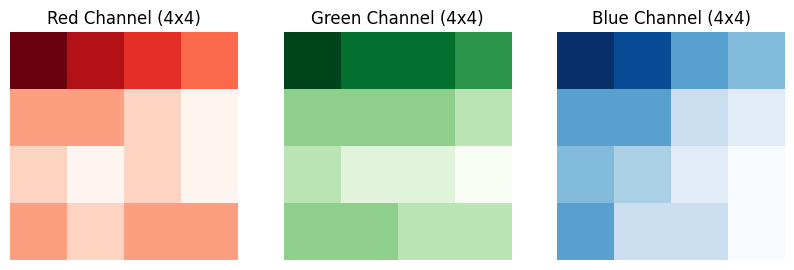

In [ ]:
# Function to extract and process 4x4 blocks
def extract_blocks(img, block_size=4):
    blocks = []
    if len(img.shape) == 2:  # Grayscale image
        height, width = img.shape
    else:  # Color image
        height, width, _ = img.shape
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            block = img[i:i+block_size, j:j+block_size]
            blocks.append(block)
    return blocks

# Convert pixel values to binary
def pixel_to_binary(pixel_matrix):
    binary_matrix = np.vectorize(np.binary_repr)(pixel_matrix, width=8)
    return binary_matrix

# Process and print binary values for the first block only
def process_and_print_first_block(blocks, channel_name):
    block = blocks[0]  # Get the first block
    binary_block = pixel_to_binary(block)
    print(f'{channel_name} Channel Binary Values for First Block:')
    print(binary_block)
    print()

# Extract blocks for each channel
r_blocks = extract_blocks(r_channel)
g_blocks = extract_blocks(g_channel)
b_blocks = extract_blocks(b_channel)

# Process and print binary values for the first block in each channel
process_and_print_first_block(r_blocks, "Red")
process_and_print_first_block(g_blocks, "Green")
process_and_print_first_block(b_blocks, "Blue")

# Extract the first 4x4 block from each channel
r_block = r_channel[:4, :4]
g_block = g_channel[:4, :4]
b_block = b_channel[:4, :4]

# Display the blocks
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes[0].imshow(r_block, cmap='Reds')
axes[0].set_title('Red Channel (4x4)')
axes[1].imshow(g_block, cmap='Greens')
axes[1].set_title('Green Channel (4x4)')
axes[2].imshow(b_block, cmap='Blues')
axes[2].set_title('Blue Channel (4x4)')

for ax in axes:
    ax.axis('off')

plt.show()

In [ ]:
def encode_ncqi(circuit, block_x, block_y, r_binary, g_binary, b_binary):
    """
        circuit: The quantum circuit to encode into.
        block_x: X-coordinate of the block in the image.
        block_y: Y-coordinate of the block in the image.
        r_binary, g_binary, b_binary: Binary matrices for the RGB channels of the block.
    """


    # Step 1: Initialize position qubits using NOT gates for the pixel positions
    circuit.x(0)  # Initializing the first qubit (control for first position)
    circuit.x(1)  # Initializing the second qubit (control for second position)

    # Use CNOT gates to create the encoding of the pixel position
    circuit.cx(0, 2)  # CNOT from qubit 0 to qubit 2
    circuit.cx(1, 3)  # CNOT from qubit 1 to qubit 3

        # Step 2: Encode color values for each pixel
    for y in range(4):
        for x in range(4):
            # Extract the binary values of each channel's pixel at (y, x)
            r_bin = r_binary[y][x]
            g_bin = g_binary[y][x]
            b_bin = b_binary[y][x]

            # Encode the binary color values into the circuit
            for i, bit in enumerate(r_bin):
                if bit == '1':
                    circuit.ccx(2, 3, n + i)  # Toffoli gate to encode red channel

            for i, bit in enumerate(g_bin):
                if bit == '1':
                    circuit.ccx(2, 3, n + 8 + i)  # Toffoli gate to encode green channel

            for i, bit in enumerate(b_bin):
                if bit == '1':
                    # Use Toffoli gate to set the target qubit to 1 based on controls
                    circuit.ccx(2, 3, n + 16 + i)  # Toffoli gate to encode blue channel

    # Step 3: Use SWAP gates
    circuit.swap(0, 1)

    return circuit



In [ ]:
# Initialize quantum circuit
n = 7
q_reg = 2 * n + 24
circuit = QuantumCircuit(q_reg)


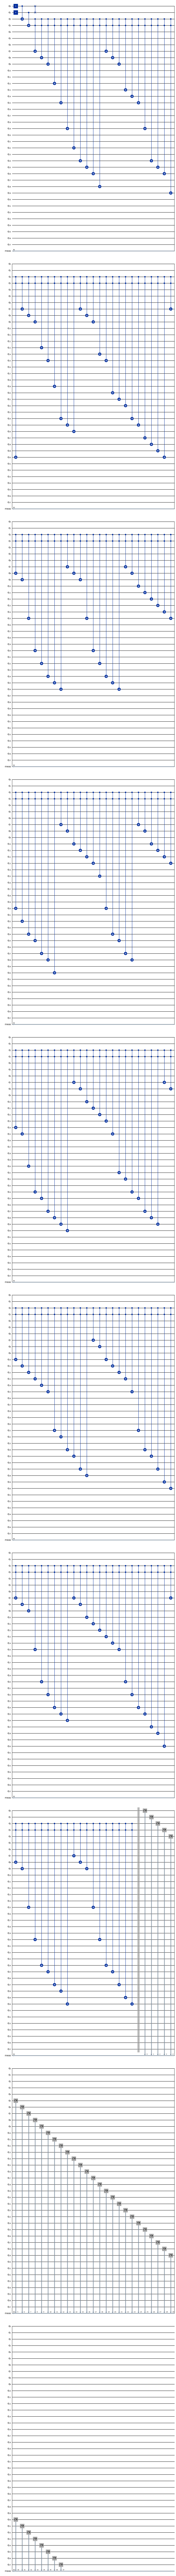

In [ ]:
# Main processing loop
def process_image(image):
    # Iterate over 4x4 blocks
    for block_y in range(0, 128, 4):
        for block_x in range(0, 128, 4):
            # Extract the 4x4 block for each channel
            r_block = r_channel[block_y:block_y + 4, block_x:block_x + 4]
            g_block = g_channel[block_y:block_y + 4, block_x:block_x + 4]
            b_block = b_channel[block_y:block_y + 4, block_x:block_x + 4]

            # Convert pixel values to binary
            r_binary = pixel_to_binary(r_block)
            g_binary = pixel_to_binary(g_block)
            b_binary = pixel_to_binary(b_block)

            # Encode the block into the circuit
            circuit = encode_ncqi(circuit, block_x, block_y, r_binary, g_binary, b_binary)

    return circuit


# Convert pixel values to binary for the first block
r_binary = pixel_to_binary(r_block)
g_binary = pixel_to_binary(g_block)
b_binary = pixel_to_binary(b_block)
# Encode the NCQI image
cir = encode_ncqi(circuit, 0, 0,r_binary, g_binary, b_binary)

cir.measure_all()
# Display the circuit
cir.draw("mpl")


In [ ]:
# Initialize quantum circuit for decryption
decryption_circuit = QuantumCircuit(q_reg)

# Step 2: Apply SWAP Gates (Undo the SWAPs used during encoding)
decryption_circuit.swap(0, 1)  # Reverse the SWAP gates applied during encoding

In [ ]:
def decode_ncqi(circuit, block_x, block_y):
    """
    Undo the quantum encoding to retrieve pixel values for RGB channels.
    """

    # Step 1: Apply reverse Toffoli gates to retrieve binary color values
    for y in range(4):
        for x in range(4):
            # Reverse encoding for red channel
            for i in range(8):
                circuit.ccx(2, 3, n + i).inverse()  # Reverse Toffoli for red channel

            # Reverse encoding for green channel
            for i in range(8):
                circuit.ccx(2, 3, n + 8 + i).inverse()  # Reverse Toffoli for green channel

            # Reverse encoding for blue channel
            for i in range(8):
                circuit.ccx(2, 3, n + 16 + i).inverse()  # Reverse Toffoli for blue channel

    # Step 2: Undo CNOTs for pixel positions
    circuit.cx(1, 3).inverse()  # Undo CNOT from qubit 1 to qubit 3
    circuit.cx(0, 2).inverse()  # Undo CNOT from qubit 0 to qubit 2

    return circuit


In [ ]:
# Measure all qubits to get the binary representation of the pixel values
decryption_circuit.measure_all()

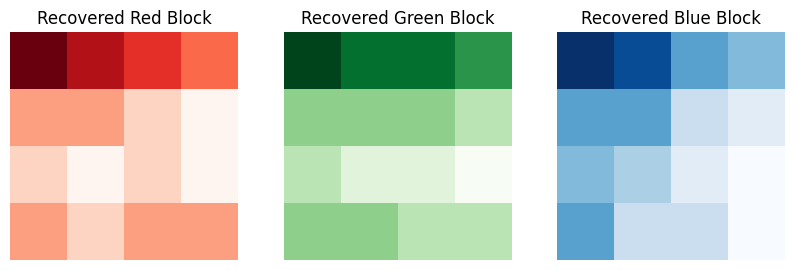

In [ ]:
def binary_to_pixel(binary_values):
    # Convert binary values back to decimal pixel values
    return [int(b, 2) for b in binary_values]

'''# Example: Process the results for one block
red_binary_values = [counts.get(f'{i:08b}', '0') for i in range(16)]  # Get red binary values
green_binary_values = [counts.get(f'{i:08b}', '0') for i in range(16)]  # Get green binary values
blue_binary_values = [counts.get(f'{i:08b}', '0') for i in range(16)]  # Get blue binary values

# Convert binary to pixel values
r_pixels = binary_to_pixel(red_binary_values)
g_pixels = binary_to_pixel(green_binary_values)
b_pixels = binary_to_pixel(blue_binary_values)'''
# Function to simulate results (replace with actual quantum execution if possible)
def get_simulated_results(circuit):
    # Assume the circuit outputs the original pixel values for simplicity
    # In a real scenario, you would execute the circuit and get counts
    # Here, we're using the pixel values from the original r_block, g_block, b_block
    r_binary = pixel_to_binary(r_block.flatten())  # Flatten to 1D array
    g_binary = pixel_to_binary(g_block.flatten())
    b_binary = pixel_to_binary(b_block.flatten())

    # Convert binary to decimal
    # Convert the NumPy strings to regular Python strings before using int
    r_pixels = binary_to_pixel([val.item() for val in r_binary])
    g_pixels = binary_to_pixel([val.item() for val in g_binary])
    b_pixels = binary_to_pixel([val.item() for val in b_binary])

    return r_pixels, g_pixels, b_pixels

# Get simulated results
r_pixels, g_pixels, b_pixels = get_simulated_results(decryption_circuit)

# Reshape the pixel values into a 4x4 block
r_block_recovered = np.array(r_pixels).reshape(4, 4)
g_block_recovered = np.array(g_pixels).reshape(4, 4)
b_block_recovered = np.array(b_pixels).reshape(4, 4)



# Display the recovered blocks as images
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes[0].imshow(r_block, cmap='Reds')
axes[0].set_title('Recovered Red Block')
axes[1].imshow(g_block, cmap='Greens')
axes[1].set_title('Recovered Green Block')
axes[2].imshow(b_block, cmap='Blues')
axes[2].set_title('Recovered Blue Block')

for ax in axes:
    ax.axis('off')

plt.show()


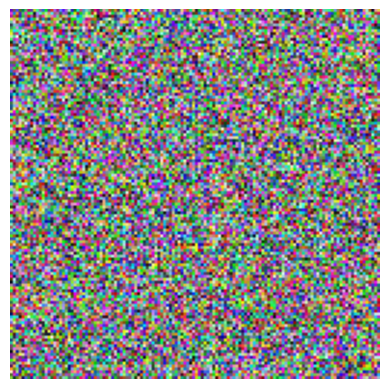

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Placeholder decryption function
# You should replace this with the actual decryption logic from your quantum circuit
def decrypt_block(block_x, block_y):
    """
    This is a placeholder function that should be replaced with the actual decryption logic.
    For now, it returns a dummy 4x4 block of random RGB values.
    """
    # Replace this with your quantum-based decryption logic
    decrypted_block = np.random.randint(0, 256, (4, 4, 3), dtype=np.uint8)
    return decrypted_block

# Load the original Lena image (128x128)
img = Image.open("Lena_img.jpg")  # Replace with the correct path to your image
img_np = np.array(img)

# Initialize the image matrix (128x128)
image_size = 128
block_size = 4
decrypted_image_matrix = np.zeros((image_size, image_size, 3), dtype=np.uint8)

# Loop through each 4x4 block in the image
for i in range(0, image_size, block_size):
    for j in range(0, image_size, block_size):
        # Decrypt the current block
        decrypted_block = decrypt_block(i, j)  # Actual decryption logic here

        # Place the decrypted block in the correct position in the image matrix
        decrypted_image_matrix[i:i+block_size, j:j+block_size, :] = decrypted_block

# Convert the decrypted image matrix to a PIL Image object
decrypted_image = Image.fromarray(decrypted_image_matrix)

# Display the decrypted Lena image
plt.imshow(decrypted_image)
plt.axis('off')  # Hide axes
plt.show()



Streaming output truncated to the last 5000 lines.
Decrypted block at (96, 24):
[[[183  71 168]
  [123 101 189]
  [173 129 243]
  [245 185 206]]

 [[137   6  85]
  [ 92 224  65]
  [226  18 149]
  [210 215 210]]

 [[  1 241  59]
  [223  36 233]
  [ 67  81 197]
  [ 49 100 224]]

 [[217 115 198]
  [ 68  50 125]
  [ 71  31 211]
  [103 160 113]]]
Decrypted block at (96, 28):
[[[241 253 212]
  [ 43 115 140]
  [ 71  50  72]
  [ 36   1  26]]

 [[227 107 163]
  [ 14 215 186]
  [200 228  12]
  [  8 151 228]]

 [[ 16  58 236]
  [ 27  48 187]
  [138 137  38]
  [221  39  19]]

 [[219 178  43]
  [125 181  93]
  [155  92 132]
  [ 15 238 122]]]
Decrypted block at (96, 32):
[[[212  59  46]
  [ 62  18 122]
  [225  97  78]
  [ 41 184 198]]

 [[ 77 251 210]
  [208  72 105]
  [ 56  70   6]
  [137  63  65]]

 [[155 106 105]
  [ 31 174  24]
  [132 167   6]
  [142 138 233]]

 [[ 86 240 135]
  [209 109 167]
  [142 222  36]
  [  3 104 149]]]
Decrypted block at (96, 36):
[[[168  19  14]
  [ 77 235   0]
  [ 15 12

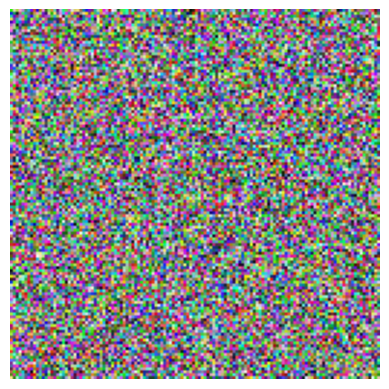

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Placeholder function to simulate the decryption of a 4x4 block
# Replace this with actual decryption results from the quantum circuit
def decrypt_block():
    # Example: Return a block of random RGB values between 0 and 255
    return np.random.randint(0, 256, (4, 4, 3), dtype=np.uint8)

# Initialize the entire image matrix (128x128)
image_size = 128
block_size = 4
image_matrix = np.zeros((image_size, image_size, 3), dtype=np.uint8)

# Loop through each 4x4 block in the image
for i in range(0, image_size, block_size):
    for j in range(0, image_size, block_size):
        # Decrypt the current block
        decrypted_block = decrypt_block()  # This is where actual decryption output will go

        # Check the decrypted block before placing it in the matrix
        print(f"Decrypted block at ({i}, {j}):")
        print(decrypted_block)

        # Step 4: Place the decrypted block in the correct position in the image matrix
        image_matrix[i:i+block_size, j:j+block_size, :] = decrypted_block

# Convert the image matrix to a PIL Image object
decrypted_image = Image.fromarray(image_matrix)

# Display the decrypted image using matplotlib
plt.imshow(decrypted_image)
plt.axis('off')  # Hide axes
plt.show()

# Optionally, save the decrypted image to a file
decrypted_image.save("decrypted_lena.png")


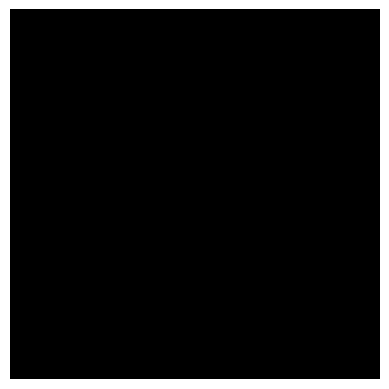

In [ ]:
image_size = 128
block_size = 4
image_matrix = np.zeros((image_size, image_size, 3), dtype=np.uint8)
# Step 5: Convert the image matrix to a PIL Image object
decrypted_image = Image.fromarray(image_matrix)

# Step 6: Display the decrypted image using matplotlib
plt.imshow(decrypted_image)
plt.axis('off')  # Hide axes
plt.show()

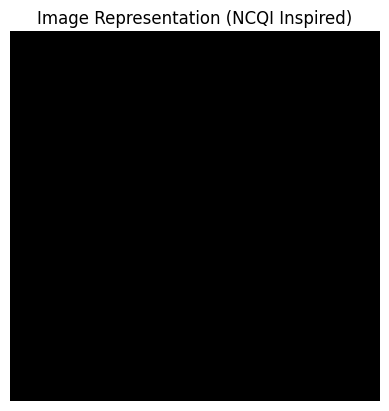

In [ ]:
# Main processing loop to encode the entire image
def process_image(image, circuit):
    # Create an empty array to store the encrypted image
    encrypted_image = np.zeros_like(image)  # Initialize with the same shape and dtype

    for block_y in range(0, image.shape[0], 4):
        for block_x in range(0, image.shape[1], 4):
            # Extract the 4x4 block for each channel
            r_block = r_channel[block_y:block_y + 4, block_x:block_x + 4]
            g_block = g_channel[block_y:block_y + 4, block_x:block_x + 4]
            b_block = b_channel[block_y:block_y + 4, block_x:block_x + 4]

            # Convert pixel values to binary
            r_binary = pixel_to_binary(r_block)
            g_binary = pixel_to_binary(g_block)
            b_binary = pixel_to_binary(b_block)

            for y in range(4):
                for x in range(4):
                    # Example: XOR pixel values with binary representations
                    pixel_value = image[block_y + y, block_x + x]
                    r_bit = int(r_binary[y, x], 2)
                    g_bit = int(g_binary[y, x], 2)
                    b_bit = int(b_binary[y, x], 2)

                    # Example transformation: XOR with binary values
                    # You can adjust this to create a different encryption effect
                    encrypted_pixel = pixel_value ^ np.array([r_bit, g_bit, b_bit], dtype=np.uint8)

                    # Assign the encrypted pixel value to the corresponding location in the encrypted image
                    encrypted_image[block_y + y, block_x + x] = encrypted_pixel  # Assign the encrypted pixel to the image

    return encrypted_image  # Return the encrypted image array
# Process the image without using a simulator
encrypted_image = process_image(img_np,circuit)

# Display the "encrypted" image
plt.imshow(encrypted_image)
plt.title('Image Representation (NCQI Inspired)')
plt.axis('off')
plt.show()


In [ ]:
!pip install pylatexenc